### ⑥ feature

In [36]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore') 

import statsmodels.api as sm  # 로지스틱함수
import scipy.stats as spst  # 카이제곱검정

#  데이터와 Y값

In [37]:
# 데이터 불러오고 확인하기
data = pd.read_csv('train.csv', sep=',') 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:>

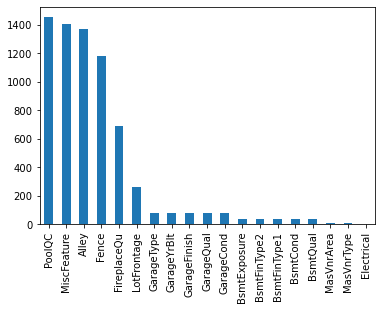

In [5]:
# 결측치 시각화 
missing = data.isnull().sum()
missing = missing[missing > 0] # 이게 데이터 프레임이 아니라 시리즈여서 가능하구나
missing.sort_values(inplace=True, ascending=False)
missing.plot.bar()

In [4]:
# y값에 대해 조사하기. 
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

34900.0 340000.0


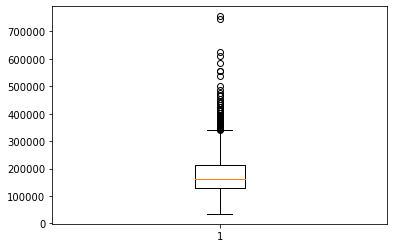

In [5]:
#박스 플롯과 박스수염플롯으로 1분위수 3분위수 표시하기 

plt.show()
box = plt.boxplot(data['SalePrice'])

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1] 

print(l_fence, u_fence)
# 이상치가 너무 많은 것을 확인. 근데 왜 저게 다르지? 밑에 사분위수랑 맞아야 하는거 아닌가?

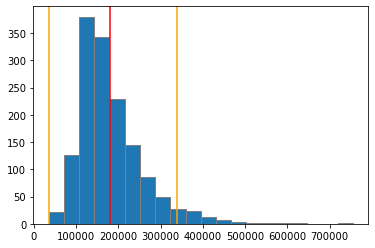

In [6]:
#바플롯으로 전체적으로 확인하기. 

avg = data['SalePrice'].mean()

plt.hist(data['SalePrice'],bins=20,edgecolor = 'gray')
plt.axvline(l_fence, color = 'orange')
plt.axvline(avg, color = 'r')
plt.axvline(u_fence, color = 'orange')
plt.show()
#표 안에, describe가 다 나오면 좋을 것 같은데? 어떻게 할 수 없나? 
# 밑에 숫자들도 좀 더 정확하게 나왔으면 좋겠는데, 분할한 만큼.. 어떻게 방법이 없나? 

In [7]:
# 이상치 좀 더 자세하게 확인하기. 
q1 = data['SalePrice'].quantile(0.25)
q3 = data['SalePrice'].quantile(0.75)

iqr = 1.5*(q3-q1)
data_q =data['SalePrice'][ data['SalePrice'] > (iqr+q3)]

# print(data_q)
#데이터를 다 보여줄 수는 없을까? 
print('이상치 갯수 :',len(data_q))
print('이상치가 있는 행 : ',list(data_q.index))

이상치 갯수 : 61
이상치가 있는 행 :  [11, 53, 58, 112, 151, 161, 178, 185, 224, 231, 278, 309, 313, 320, 321, 336, 349, 378, 389, 440, 473, 477, 481, 496, 515, 527, 585, 591, 608, 642, 644, 654, 661, 664, 678, 688, 691, 702, 718, 769, 774, 798, 803, 825, 877, 898, 987, 990, 1046, 1142, 1169, 1181, 1182, 1228, 1243, 1267, 1268, 1353, 1373, 1388, 1437]


In [38]:
# 범주형과 숫자형 데이터 구분. 

#내가 맡은 열
data_j = data.iloc[:,17:33]

#내가 맡은 열중 숫자형, 범주형 분리 
data_n = data_j.select_dtypes(exclude ='object')
data_c = data_j.select_dtypes(include = 'object')
data_n.info(), data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   int64  
 1   OverallCond   1460 non-null   int64  
 2   YearBuilt     1460 non-null   int64  
 3   YearRemodAdd  1460 non-null   int64  
 4   MasVnrArea    1452 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 57.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   RoofStyle     1460 non-null   object
 1   RoofMatl      1460 non-null   object
 2   Exterior1st   1460 non-null   object
 3   Exterior2nd   1460 non-null   object
 4   MasVnrType    1452 non-null   object
 5   ExterQual     1460 non-null   object
 6   ExterCond     1460 non-null   object
 7   Foundation    1460 non-null   object
 8   BsmtQual  

(None, None)

In [4]:
# 숫자형, 범주형 변수명 확인
print(data_n.columns)
print("*"*80)
print(data_c.columns)

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea'],
      dtype='object')
********************************************************************************
Index(['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure'],
      dtype='object')


# 1.범주형 Y

In [10]:
# 범주형 고유값 별 데이터 갯수와 퍼센티지
data_c_cols = data_c.columns

data.loc

for i,a in zip(list(data_c),data_c_cols) : 
    print('열 이름 :',a)
    print(data[i].value_counts()) #갯수
    print(data[i].value_counts(normalize=True)) # 전체 퍼센티지
    print('#'*50)

열 이름 : RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: RoofStyle, dtype: float64
##################################################
열 이름 : RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
ClyTile       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64
CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.003425
Membran    0.000685
ClyTile    0.000685
Metal      0.000685
Roll       0.000685
Name: RoofMatl, dtype: float64
##################################################
열 이름 : Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
CBlock       1
AsphShn   

## 1.가설수립

* 최소 6개의 가설을 수립하시오.

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
④ 기초통계량

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 21) 'RoofStyle'(범주형)

In [4]:
var = data_c.columns[0]
var

'RoofStyle'

1) 변수의 비즈니스 의미

> * 'RoofStyle' 지붕 스타일
|범주|내용|
|------|---|
|Flat| Flat|
|Gable| Gable 합각,박공|
|Gambrel| Gabrel(Barn) 2단 박공지붕|
|Hip|Hip 우진각 지붕(다각형 지붕?)|
|Mansard|Mansard 망사르드 지붕(명칭 그대로)|
|Shed| Shed 외쪽 지붕|

여러 지붕형태 

<img src="https://coresos-phinf.pstatic.net/a/2j3176/h_2gbUd018svc57ytb6i4z8sd_r3104h.jpg?type=e1920_std" width = 800)><br>


3-1) NaN 존재 유무 및 조치방안

In [15]:
data[var].isna().sum()

0

3-2) 가변수화 필요 여부

In [16]:
data[var].unique() #필요 하다고 판단. 

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

4) 기초통계량(수치화)

In [22]:
# 범주별 빈도수
data[var].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [23]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: RoofStyle, dtype: float64

In [21]:
data[var].shape

(1460,)

In [26]:
data[var].value_counts().index

Index(['Gable', 'Hip', 'Flat', 'Gambrel', 'Mansard', 'Shed'], dtype='object')

5) 분포 확인(시각화)

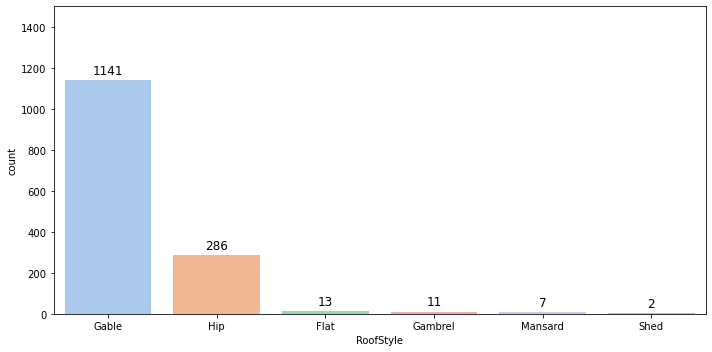

In [27]:
warnings.filterwarnings(action='ignore')  # 경고 무시

plt.figure(figsize = (10, 5))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"),
              order = data[var].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
ax.set_ylim(0, 1500)

# plt.subplot(1, 2, 2)
# cnt = data[var].value_counts() 
# plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
#         colors = sns.color_palette("pastel"), explode = [0.02, 0.02, 0.02, 0.02, 0.02])

plt.tight_layout()
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 박공형 지붕인 집이 많다.78.15%를 차지한다. 지붕의 형태에 따른 가격차이가 있을까? flat 형태의 지붕은 아파트일까? 아니면 상가일까? 지붕과 다락방의 관계가 있을 것 같다.

8) 추가 분석해 볼 사항이 있나요?

> * 

### 22) 'RoofMatl' (범주형)

In [56]:
# 범주 3개짜리
var = data_c.columns[1]
var

'RoofMatl'

1) 변수의 비즈니스 의미

> * RoofMatl: Roof material(지붕재료)
|범주|내용|
|------|---|
       |ClyTile |Clay or Tile(점토(기와?) 또는 타일)|
       |CompShg|Standard (Composite) Shingle 표준 합성물|
      |Membran |Membrane(막)|
       |Metal|Metal|
       |Roll|Roll|
       |Tar&Grv	|Gravel & Tar(자갈 & 타르)|
       |WdShake | Wood Shakes 울퉁불퉁 나무재질|
       |WdShngl |Wood Shingles 평평 나무재질|

		

3) NaN 존재 유무 및 조치방안

In [57]:
data[var].isna().sum()

0

5) 기초통계량(수치화)

In [58]:
# 범주별 빈도수
data[var].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
ClyTile       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

In [59]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.003425
Membran    0.000685
ClyTile    0.000685
Metal      0.000685
Roll       0.000685
Name: RoofMatl, dtype: float64

6) 분포 확인(시각화)

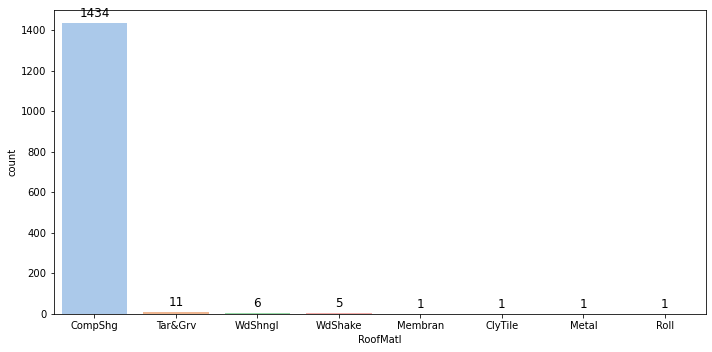

In [60]:
warnings.filterwarnings(action='ignore')  # 경고 무시

plt.figure(figsize = (10, 5))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"),
              order = data[var].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
ax.set_ylim(0, 1500)

# plt.subplot(1, 2, 2)
# cnt = data[var].value_counts() 
# plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
#         colors = sns.color_palette("pastel"), explode = [0.02, 0.02, 0.02, 0.02, 0.02])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 표준합성물(compshg)dl 98.21%로 압도적으로 많다. 나무스타일의 지붕 두 개는 합쳐도 될 것 같다. 

8) 추가 분석해 볼 사항이 있나요?

> * 그리고 1개씩 있는 재료의 집들은 가격이 어떻게 될까? 유니크하다는 것은 때로는 가격과 연관이 있을 것 같다. 대중적이라는 것과 유니크는 따로 생각을 해보면 좋을 것 같다. 그리고 유니크 한 재료를 사용했다는 것은 특별한 이유가 있을 것 같은데 이런 것들을 조사해볼 필요가 있다.

### 23) 'Exterior1st' (범주형)

In [29]:
# 범주 3개짜리
var = data_c.columns[2]
var

'Exterior1st'

1) 변수의 비즈니스 의미

> * Exterior1st: Exterior covering on house (집을 덮고 있는 외장용 자재-건물의 외부 마감재)

|범주|내용|
|------|---|
       |AsbShng | Asbestos Shingles 석면 널판지 |
       |AsphShn	|Asphalt Shingles 아스팔트 널판지|
       |BrkComm	|Brick Common 일반 벽돌 |
       |BrkFace|Brick Face 외장 벽돌|
       |CBlock	|Cinder Block 콘크리트 블록|
       |CemntBd |Cement Board 시멘트 판 |
       |HdBoard |Hard Board 하드보드|
       |ImStucc |Imitation Stucco 모조 치장벽토 |
       |MetalSd	| Metal Siding 준불연 외장재|
       |Other |	Other |
       |Plywood |Plywood 합판|
       |PreCast|PreCast 블록 모양으로 성형된 콘크리트|
       |Stone |	Stone |
       |Stucco |	Stucco 치장벽토 |
       |VinylSd | Vinyl Siding 비닐 벽판자|
       |Wd Sdng | Wood Siding 나무 벽판자 |
       |WdShing	| Wood Shingles 나무 널판지|

* 구분하기 어려워 보이는 재료들


Wood Siding 나무 벽판자 

<img src="https://search.pstatic.net/sunny/?src=https%3A%2F%2Fi.pinimg.com%2F736x%2F9d%2Fde%2Faf%2F9ddeafa5c4b8f42d2f638c5acea836e0--cummins-exterior.jpg&type=sc960_832" width = 200)><br>


Wood Shingles 나무 널판지 (잘게 잘게 넓판지로 마감) 

<img src="https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2F20130822_50%2Fwelovenana_1377138541671sbN4W_JPEG%2FThe-perfect-wooden-home-16.jpg&type=sc960_832" width = 200)><br>


Stucco 치장벽토

<img src="https://search.pstatic.net/sunny/?src=https%3A%2F%2Fi.pinimg.com%2F736x%2Ff2%2F46%2F2b%2Ff2462b656e111b04b37bc245bd373134--cement-texture.jpg&type=sc960_832" width = 200)><br>


Stone 

<img src="https://search.pstatic.net/sunny/?src=https%3A%2F%2Fi.pinimg.com%2F736x%2Fb4%2F88%2F54%2Fb488545911d431c5f91ce5482413ba15.jpg&type=a340" width = 200)><br>




콘크리트 블록
<img src="https://search.pstatic.net/sunny/?src=https%3A%2F%2Fstatic.turbosquid.com%2FPreview%2F2016%2F11%2F28__06_32_15%2FCinder_Block_01_Thumbnail_Square_0000.jpg829EB2B0-4E1C-420B-BA15-97183F52A211Large.jpg&type=sc960_832" width = 200)><br>


PreCast 블록 모양으로 성형된 콘크리트

<img src="https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAxNzA4MTBfNzEg%2FMDAxNTAyMzU1MDA0NjQ5.Sm3vXmXh_3W2cUvsiXoDISHk75shBXIs0_wCpdxkUZ4g.MS__hYgVqgVjdx1c84WDZ-h-KU9goa4mVp7ndCJ-OGEg.JPEG.miicrete%2F0caaaab58bb93245ad90fddae67b33e2.jpg&type=a340" width = 200)><br>



3) NaN 존재 유무 및 조치방안

In [7]:
data[var].isna().sum()

0

5) 기초통계량(수치화)

In [6]:
# 범주별 빈도수
data[var].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

In [8]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
BrkComm    0.001370
Stone      0.001370
AsphShn    0.000685
CBlock     0.000685
ImStucc    0.000685
Name: Exterior1st, dtype: float64

6) 분포 확인(시각화)

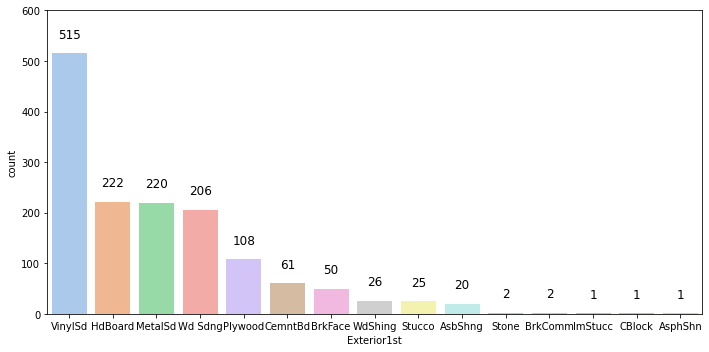

In [30]:
warnings.filterwarnings(action='ignore')  # 경고 무시

plt.figure(figsize = (10, 5))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"),
              order = data[var].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
ax.set_ylim(0, 600)

# plt.subplot(1, 2, 2)
# cnt = data[var].value_counts() 
# plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
#         colors = sns.color_palette("pastel"), explode = [0.02, 0.02, 0.02, 0.02, 0.02])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 데이터가 어느정도 고르게 분포되어 있다. 이변량에서 각 유니크 마다의 중간값을 조사한 다음, 비슷한 것들이 서로 차이가 나지 않을 때 합치면 좋은 결과가 나올 것 같다. 

8) 추가 분석해 볼 사항이 있나요?

> * 그리고 밑에 것도 같은 거니 두 개를 조사하면 될 것 같은데, 두 열을 비교해서 행들이 다른 것을 조사해보자. 다중공선성을 조사할 수 있을 것 같다.

### 24) 'Exterior2nd' (범주형)


In [10]:
# 범주 3개짜리
var = data_c.columns[3]
var

'Exterior2nd'

1) 변수의 비즈니스 의미

> * Exterior1st와 동일

3) NaN 존재 유무 및 조치방안

In [11]:
data[var].isna().sum()

0

5) 기초통계량(수치화)

In [12]:
# 범주별 빈도수
data[var].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [13]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
CBlock     0.000685
Other      0.000685
Name: Exterior2nd, dtype: float64

6) 분포 확인(시각화)

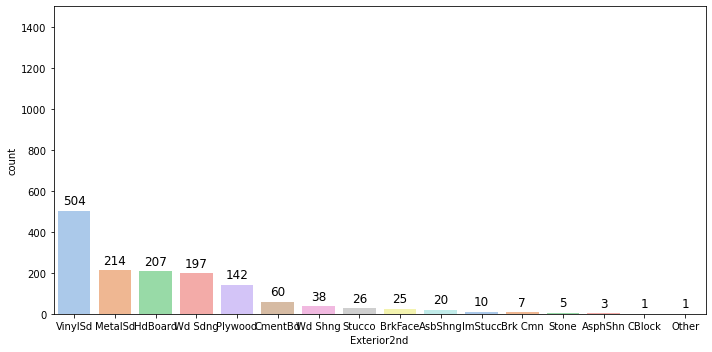

In [14]:
warnings.filterwarnings(action='ignore')  # 경고 무시

plt.figure(figsize = (10, 5))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"),
              order = data[var].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
ax.set_ylim(0, 1500)

# plt.subplot(1, 2, 2)
# cnt = data[var].value_counts() 
# plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
#         colors = sns.color_palette("pastel"), explode = [0.02, 0.02, 0.02, 0.02, 0.02])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 위의 것과 비교하면서 봐도 좋을 것 같다. 열을 삭제해야하는가? 아니면 포함해야 하는가? 두개가 과연 어떠한 상관관계를 가지고 있을지 궁금하다


In [5]:
data['Exterior2nd'].loc[0]

'VinylSd'

In [26]:
# 진수는 참지않긔 두 개의 열을 조사해보자.

com = data['Exterior1st'] == data['Exterior2nd']
com_list = list(com[com == False].index)
dif = data['Exterior1st'].loc[com_list]
dif.value_counts()

CemntBd    61
Wd Sdng    29
HdBoard    29
WdShing    26
BrkFace    26
VinylSd    13
Plywood    12
MetalSd     8
Stucco      5
AsbShng     3
BrkComm     2
Stone       1
Name: Exterior1st, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


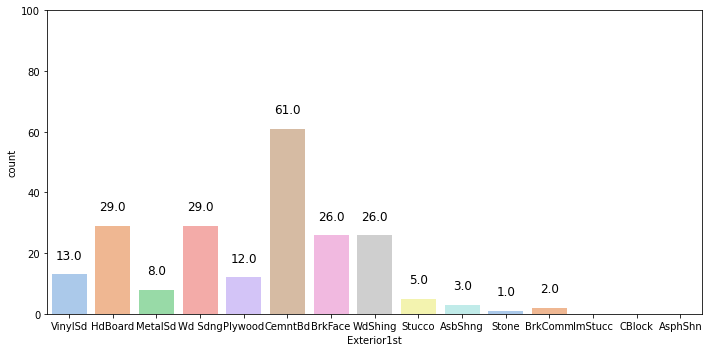

In [35]:
warnings.filterwarnings(action='ignore')  # 경고 무시

plt.figure(figsize = (10, 5))

# plt.subplot(1, 2, 1)
ax = sns.countplot(dif, palette = sns.color_palette("pastel"),
              order = data[var].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, height, ha = 'center', size = 12)
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

'Exterior1st'기준으로 차이 조사. 위에는 'Exterior1st'에서 선택한 것들 중 Exterior2nd에서 다른 것들을 선택한 경우. 밑에 표는 'Exterior1st'

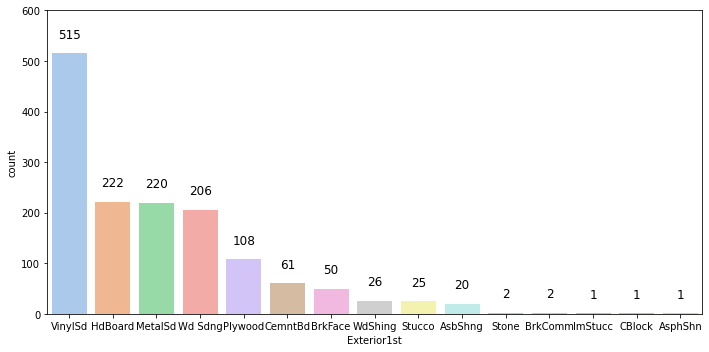<br>

215개의 주택이 다른 마감재료를 선택해서 더했다. 여기서 바꿨던 요인들이 과연 가격에 영향을 주었을까? 영향을 주었다면 왜 영향을 주었을까? 이따가 이변량에서 'Exterior1st' / dif = data['Exterior1st'].loc[com_list] / 'Exterior2nd' y값에 대한 각각의 상관관계를 비교해보자!  

### 25) 'MasVnrType' (범주형)

In [37]:
# 범주 3개짜리
var = data_c.columns[4]
var

'MasVnrType'

1) 변수의 비즈니스 의미

> * MasVnrType: Masonry veneer type (벽돌 베니어 유형, 위에와 같은 벽면 마감인 것 같은데, 벽돌로 쌓을 때는 말하는 것 같다.) 

|범주|내용|
|------|---|
       BrkCmn|	Brick Common
       BrkFace|	Brick Face
       CBlock	|Cinder Block
       None |	None
       Stone |	Stone

3) NaN 존재 유무 및 조치방안

In [38]:
data[var].isna().sum()

8

5) 기초통계량(수치화)

In [39]:
# 범주별 빈도수
data[var].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [40]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

None       0.591781
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
Name: MasVnrType, dtype: float64

In [45]:
data[var][data[var] == 'CBlock']

Series([], Name: MasVnrType, dtype: object)

뭔가 이상하다. 범주열중에 CBlock은 없고 그리고 Nan값이 8개가 있다. 근데 확인해보니 MasVnrArea에도 똑같은 Nan 값이 보인다. 

6) 분포 확인(시각화)

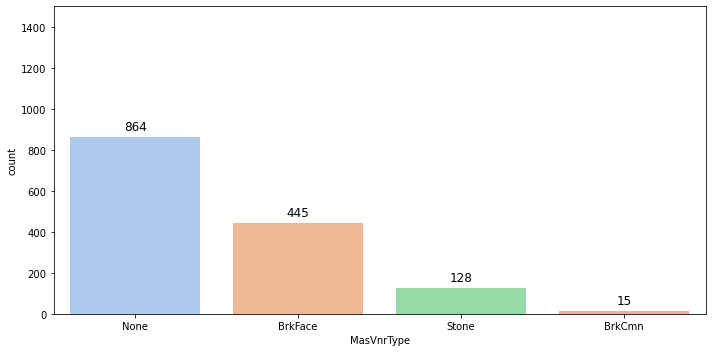

In [67]:
warnings.filterwarnings(action='ignore')  # 경고 무시

plt.figure(figsize = (10, 5))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"),
              order = data[var].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
ax.set_ylim(0, 1500)

# plt.subplot(1, 2, 2)
# cnt = data[var].value_counts() 
# plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
#         colors = sns.color_palette("pastel"), explode = [0.02, 0.02, 0.02, 0.02, 0.02])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 위에 것들이랑 연관이 있는 것 같은데? 외부 마감을 할 때 석조 시공을 말하는 것 같다. 그리고 여기서 None 값은 외부 마감과 함께 생각해보면 되지 않을까? Exterior1st과 Exterior2nd와 함께 연관조사가 필요하다. 3개의 열만가지고 조사하면 공통점들에서 뭔가가 나올 듯 하다. 

8) 추가 분석해 볼 사항이 있나요?

> * 여기서 None의 경우는 어떤 경우에 해당되는 걸까? 혹시나 외부 마감재와 연관이 있는 것은 아닐까? 외부 마감재 1과 2를 비교해볼 필요가 있을 것 같다.

8) 추가 분석해 볼 사항이 있나요?

> * 여기서의 None 값을 따로 뽑아서 외부 마감재와 비교, 그렇게 함으로서 벽돌 베니어가 어떠한 관계가 있는지를 조사 후에, 그에 맞춰서 None 값을 채우면 될 것 같음.

In [63]:
# 또 진수는 참지않긔 Exterior1st와 관련도를 조사함. 

None_list = list(data['MasVnrType'][data['MasVnrType']=='None'].index)
dif2 = data['Exterior1st'].loc[None_list]

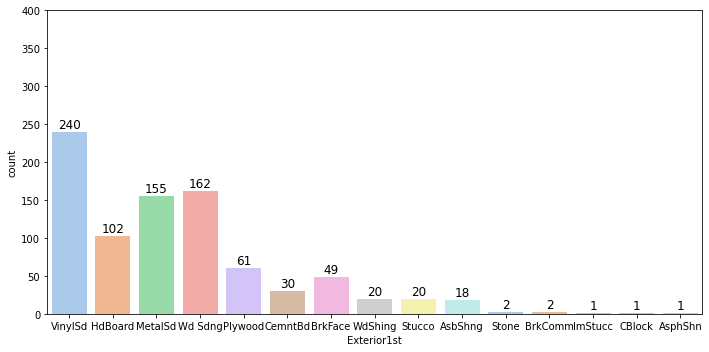

In [64]:
warnings.filterwarnings(action='ignore')  # 경고 무시

plt.figure(figsize = (10, 5))

# plt.subplot(1, 2, 1)
ax = sns.countplot(dif2, palette = sns.color_palette("pastel"),
              order = data['Exterior1st'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, height, ha = 'center', size = 12)
ax.set_ylim(0, 400)

plt.tight_layout()
plt.show()

In [65]:
# 사실 확인을 위해 다른 변수들도 3개 더 조사.

None_list2 = list(data['MasVnrType'][data['MasVnrType']=='BrkFace'].index)
dif3 = data['Exterior1st'].loc[None_list3]

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


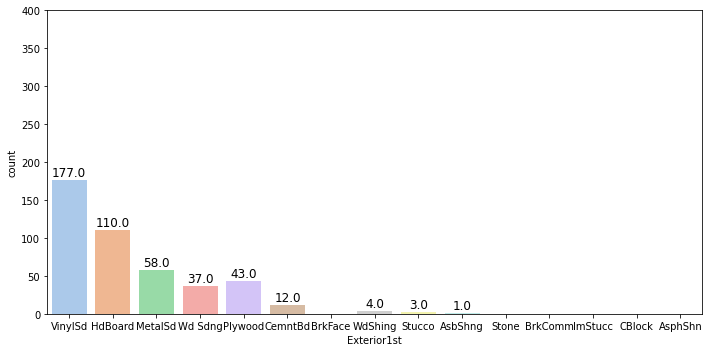

In [62]:
warnings.filterwarnings(action='ignore')  # 경고 무시

plt.figure(figsize = (10, 5))

# plt.subplot(1, 2, 1)
ax = sns.countplot(dif3, palette = sns.color_palette("pastel"),
              order = data['Exterior1st'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, height, ha = 'center', size = 12)
ax.set_ylim(0, 400)

plt.tight_layout()
plt.show()
# 12개의 열이 사라짐.
# 아니 근데.. 사라진 열들 중에는 BrkFace가 없는데? 오히려 그게 있어야 하는거 아니야? 벽돌 베니어와 무슨 

In [67]:
None_list3 = list(data['MasVnrType'][data['MasVnrType']=='Stone'].index)
dif4 = data['Exterior1st'].loc[None_list3]

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


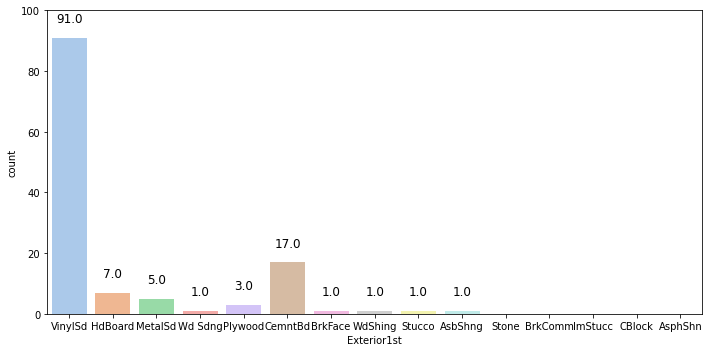

In [69]:
warnings.filterwarnings(action='ignore')  # 경고 무시

plt.figure(figsize = (10, 5))

# plt.subplot(1, 2, 1)
ax = sns.countplot(dif4, palette = sns.color_palette("pastel"),
              order = data['Exterior1st'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, height, ha = 'center', size = 12)
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()
# 10개의 열이 사라짐. 

In [71]:
None_list4 = list(data['MasVnrType'][data['MasVnrType']=='BrkCmn'].index)
dif5 = data['Exterior1st'].loc[None_list4]

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


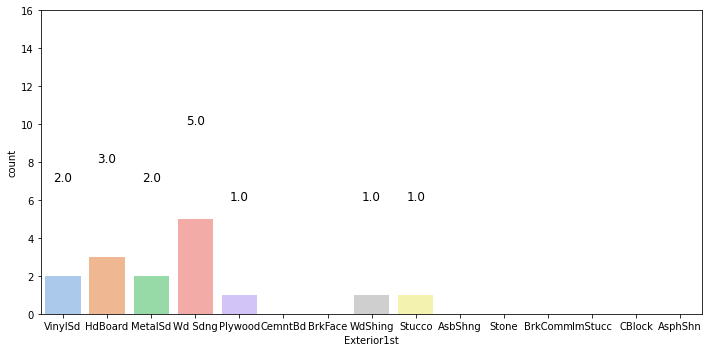

In [73]:
warnings.filterwarnings(action='ignore')  # 경고 무시

plt.figure(figsize = (10, 5))

# plt.subplot(1, 2, 1)
ax = sns.countplot(dif5, palette = sns.color_palette("pastel"),
              order = data['Exterior1st'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, height, ha = 'center', size = 12)
ax.set_ylim(0, 16)

plt.tight_layout()
plt.show()
# 열이 7개만 남음. 

Exterior1st와 벽돌 베니어의 관계를 조사해본 결과, 두개가 연결된 범주가 아님을 확인. 두 개의 열은 다른 맥락으로 보면 될 것 같으며, None은 말그대로 벽돌 베니어를 했는가 아닌가를 알 수 있는 지표. 또한 None 값이 있고 그것이 60프로 이상을 차지하는 것으로 봐서는 건물을 구성하는데 꼭 필요한 요소는 아닌 것으로 판단. 이것이 가격과 어떠한 상관관계를 가지고 있을지는 확인 필요.

### 27) 'ExterQual' (범주형)

In [78]:
# 범주 3개짜리
var = data_c.columns[5]
var

'ExterQual'

1) 변수의 비즈니스 의미

> * ExterQual: Evaluates the quality of the material on the exterior 외장재에 대한 품질 평가

|범주|내용|
|------|---|
       Ex|	Excellent
       Gd|	Good
       TA|	Average/Typical
       Fa|	Fair
       Po|	Poor
		

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [79]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

> * 맵핑으로 해서 수치화를 해야할 필요가 있음

5) 기초통계량(수치화)

In [81]:
# 범주별 고유값 
data[var].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [70]:
# 범주별 빈도수
data[var].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [76]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: ExterQual, dtype: float64

6) 분포 확인(시각화)

posx and posy should be finite values
posx and posy should be finite values


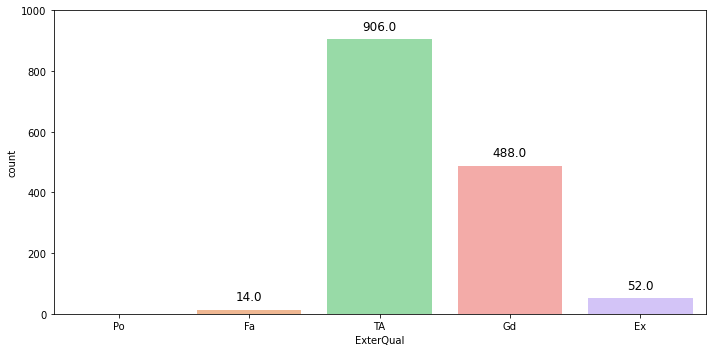

In [83]:
warnings.filterwarnings(action='ignore')  # 경고 무시

plt.figure(figsize = (10, 5))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"),
              order = ['Po','Fa','TA', 'Gd', 'Ex' ])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
ax.set_ylim(0, 1000)

# plt.subplot(1, 2, 2)
# cnt = data[var].value_counts() 
# plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
#         colors = sns.color_palette("pastel"), explode = [0.02, 0.02, 0.02, 0.02, 0.02])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * Po에 대한 값이 없다. 게다가 Nan 값도 없어서 조금 의아하다. 

8) 추가 분석해 볼 사항이 있나요?

> * 

### 28) 'ExterCond' (범주형)

In [86]:
# 범주 3개짜리
var = data_c.columns[6]
var

'ExterCond'

1) 변수의 비즈니스 의미

> * ExterCond: Evaluates the present condition of the material on the exterior 외장재의 현상태 평가

|범주|내용|
|------|---|
       Ex |	Excellent
       Gd |	Good
       TA |	Average/Typical
       Fa |	Fair
       Po | Poor

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [87]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

> * 이것도 마찬가지로 맵핑해야할 필요가 있음. 

5) 기초통계량(수치화)

In [88]:
# 범주별 빈도수
data[var].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [89]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

TA    0.878082
Gd    0.100000
Fa    0.019178
Ex    0.002055
Po    0.000685
Name: ExterCond, dtype: float64

6) 분포 확인(시각화)

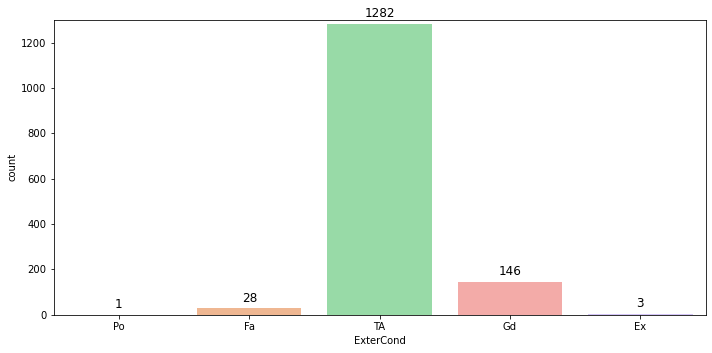

In [91]:
warnings.filterwarnings(action='ignore')  # 경고 무시

plt.figure(figsize = (10, 5))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"),
              order = ['Po','Fa','TA', 'Gd', 'Ex' ])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
ax.set_ylim(0, 1300)

# plt.subplot(1, 2, 2)
# cnt = data[var].value_counts() 
# plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
#         colors = sns.color_palette("pastel"), explode = [0.02, 0.02, 0.02, 0.02, 0.02])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 외장재이니 23,24,25 번 열과 비교해서 평가가 어떻게 나왔는지를 확인해볼까? 아니면 연도별에 따른 평가 수치를 따로 해볼 수 있을까? 

8) 추가 분석해 볼 사항이 있나요?

> * 

### 29) 'Foundation' (범주형)

In [92]:
# 범주 3개짜리
var = data_c.columns[7]
var

'Foundation'

1) 변수의 비즈니스 의미

> * Foundation: Type of foundation(건물의 토대/기초/기반 - 집의 하단에 사용된 재료가 아닐까?) 

| 범주 | 내용 |
|------|------|
       BrkTil |	Brick & Tile
       CBlock |	Cinder Block 벽돌형 콘크리트
       PConc |	Poured Contrete 부어서 하는 콘크리트 
       Slab |	Slab 판
       Stone |	Stone 
       Wood |	Wood
       

       
나무로 토대를 세우는 것이 실제로 가능한가보네... 아.. 그래도 floor로 봐야하는거 아닌가? brick & tile은... 

   <img src="http://www.nzdl.org/gsdl/collect/hdl/index/assoc/HASH70c8.dir/p189.png" width = 300)><br>    
       
       
       

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [93]:
data[var].isna().sum()

0

5) 기초통계량(수치화)

In [94]:
# 범주별 빈도수
data[var].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [95]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: Foundation, dtype: float64

6) 분포 확인(시각화)

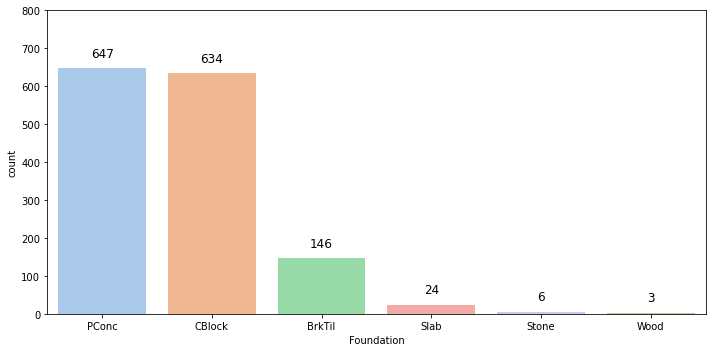

In [97]:
warnings.filterwarnings(action='ignore')  # 경고 무시

plt.figure(figsize = (10, 5))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"),
              order = data[var].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
ax.set_ylim(0, 800)

# plt.subplot(1, 2, 2)
# cnt = data[var].value_counts() 
# plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
#         colors = sns.color_palette("pastel"), explode = [0.02, 0.02, 0.02, 0.02, 0.02])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * brick & tile이 꽤 사용되어지고 있네... slab보다 더 많이 사용되어지고 있는데 조금 더 생각해볼 일이다. 파운데이션이 floor의 개념으로 봐야할지, 아지면 토대 공사에서 또 다른 용어인지를 잘 모르겠다. 뭐 어찌 되었든 콘크리트가 70프로 이상을 차지하고 있다. 

8) 추가 분석해 볼 사항이 있나요?

> * wood로 된 것은 설립 연도를 확인 할 수 있으려나? 저런식으로 지어지면 집값이 낮을 것 같은데? wood, 설립 연도, 집값이 어떻게 될지 확인해보기. 

### 30) 'BsmtQual' (범주형)

In [113]:
# 범주 3개짜리
var = data_c.columns[8]
var

'BsmtQual'

1) 변수의 비즈니스 의미

> * BsmtQual: Evaluates the height of the basement (지하실 높이)

| 범주 | 내용 |
|------|------|
       Ex |	Excellent (100+ inches)	
       Gd |	Good (90-99 inches)
       TA |	Typical (80-89 inches)
       Fa |	Fair (70-79 inches)
       Po |	Poor (<70 inches
       NA |	No Basement

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [114]:
data[var].isna().sum()

37

In [117]:
print(data[var].isna()[data[var].isna() == True].index)

Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412],
           dtype='int64')


> * 저 Nan 값은 Po나 0 값일 것 같은데... 흠.. 이건 다른 열들 보고 판단해야할 듯

4) 가변수화 필요 여부

> * 연속형으로 볼 수 있는 범주형이다. 맵핑으로 처리할 필요 있음.

5) 기초통계량(수치화)

In [103]:
# 범주별 빈도수
data[var].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [104]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

TA    0.444521
Gd    0.423288
Ex    0.082877
Fa    0.023973
Name: BsmtQual, dtype: float64

6) 분포 확인(시각화)

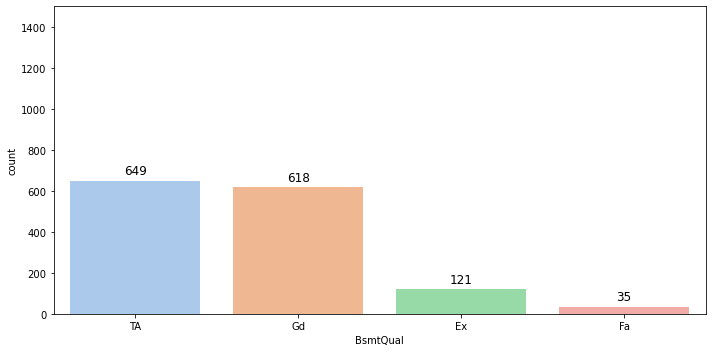

In [99]:
warnings.filterwarnings(action='ignore')  # 경고 무시

plt.figure(figsize = (10, 5))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"),
              order = data[var].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
ax.set_ylim(0, 1500)

# plt.subplot(1, 2, 2)
# cnt = data[var].value_counts() 
# plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
#         colors = sns.color_palette("pastel"), explode = [0.02, 0.02, 0.02, 0.02, 0.02])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 전체적으로 분포가 정규분포의 형식을 띄고 있다. 또한 nan 값이 0값과 Po로 되어 있다 나중에 고민해보기.

8) 추가 분석해 볼 사항이 있나요?

> * 

### 31) 'BsmtCond' (범주형)

In [120]:
# 범주 3개짜리
var = data_c.columns[9]
var

'BsmtCond'

1) 변수의 비즈니스 의미

> * BsmtCond: Evaluates the general condition of the basement (지하실의 일반적인 상태 평가) 

| 범주 | 내용 |
|------|------|
       Ex |	Excellent
       Gd |	Good
       TA |	Typical - slight dampness allowed (약간의 습한정도)
       Fa |	Fair - dampness or some cracking or settling (습함, 깨짐,침하) 
       Po |	Poor - Severe cracking, settling, or wetness (심하게 누수, 깨짐, 침하)
       NA |	No Basement

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [121]:
data[var].isna().sum()

37

> * 이따라 위의 열과 함께 비교해보고 분석하기

4) 가변수화 필요 여부

> * 수치로 나타낼 수 있는 범주이므로 맵핑으로 처리해서 수치화 시킬 필요가 있다고 본다. 

5) 기초통계량(수치화)

In [122]:
# 범주별 빈도수
data[var].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [123]:
data[var].unique()
#오잉 Ex가 없네!! 

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [124]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

TA    0.897945
Gd    0.044521
Fa    0.030822
Po    0.001370
Name: BsmtCond, dtype: float64

6) 분포 확인(시각화)

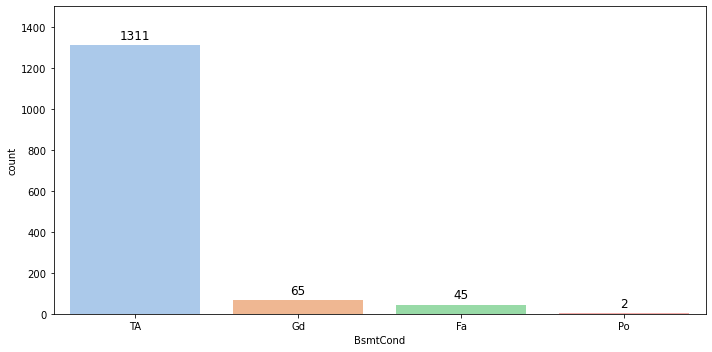

In [125]:
warnings.filterwarnings(action='ignore')  # 경고 무시

plt.figure(figsize = (10, 5))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"),
              order = data[var].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
ax.set_ylim(0, 1500)

# plt.subplot(1, 2, 2)
# cnt = data[var].value_counts() 
# plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
#         colors = sns.color_palette("pastel"), explode = [0.02, 0.02, 0.02, 0.02, 0.02])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 여기에는 Ex값은 아에 고유값도 없다. 그러므로 Na 값은 지하실일 확률이 높은데 좀 더 정확한 조사 필요

8) 추가 분석해 볼 사항이 있나요?

> * BsmtQual과 BsmtCond에서의 Nan값 비교해보기 (Po인지 Na인지 확인 필요)

In [128]:
# 각각의 Na 값이 서로 행이 일치한지 확인하기

A = data['BsmtCond'].isna()[data['BsmtCond'].isna() == True].index
B = data['BsmtQual'].isna()[data['BsmtQual'].isna() == True].index
print(A)
print(B)
A==B

Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412],
           dtype='int64')
Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412],
           dtype='int64')


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

이것으로 'BsmtCond'에서는 Ex가 없으며 Nan 값은 지하실이 없는 주택으로 판단. 그리고 BsmtQual에서 Po값은 없으며 나머지는 지하실이 없는 것으로 판단. 맵핑할 때 고려하기

### 32) 'BsmtExposure' (범주형)

In [129]:
# 범주 3개짜리
var = data_c.columns[10]
var

'BsmtExposure'

1) 변수의 비즈니스 의미

> * BsmtExposure: Refers to walkout or garden level walls (지하실 외부 개방정도) 

| 범주 | 내용 |
|------|------|
       Gd |	Good Exposure
       Av |	Average Exposure (split levels or foyers typically score average or above)	
       Mn |	Mimimum Exposure
       No |	No Exposure
       NA |	No Basement
       
       
 <br>	
 외국은 지하실이 그냥 지하실이 아니다. 거의 1층과 다름 없는 지하실도 있다.<br>
 그렇게 외부와의 연결이 잘 되어져 있다면, 그 공간을 walkout basement라고 하던가 <br> 
 아니면 그렇게 연결되어 있는 공간이 어느정도 평탄하다면 그곳에 가든을 만들기에, garden basement라고 한다.<br>  
    
 > * garden basement
    
<img src="https://becowallform.co.uk/wp-content/uploads/2013/06/162-selfbuilt-custom-home-using-wallform-crop-5x8.jpg" width = 300)><br>
    
 > * walkout basement 
    
<img src="https://captainhandy.ca/wp-content/uploads/2020/10/image-Main-features-of-Basement-walkout.jpg" width = 300)><br>
    

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [130]:
data[var].isna().sum()

38

> * NA값은 지하실이 없는 경우. 어라? 왜 여기는 Na 값이 하나가 더 추가 되었을까? 흠.. 다른 행들과 비교해서 하나를 파악한 후에 그에 대한 알맞은 값을 채워넣으면 될 듯

4) 가변수화 필요 여부

> * 이것도 맵핑화 시키면 될 것 같다. 아니면 3개의 범주로 나누면 되려나? 아니면 지하실이 없다. 노출이 없다. 노출이 있다 3개로 나눠도? 

5) 기초통계량(수치화)

In [132]:
# 범주별 빈도수
data[var].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [133]:
data[var].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [134]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

No    0.652740
Av    0.151370
Gd    0.091781
Mn    0.078082
Name: BsmtExposure, dtype: float64

6) 분포 확인(시각화)

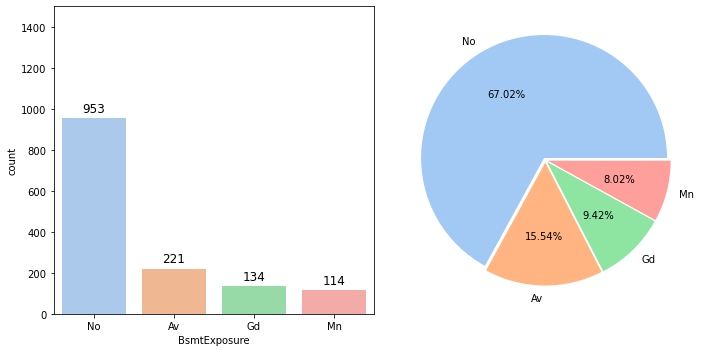

In [135]:
warnings.filterwarnings(action='ignore')  # 경고 무시

plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"),
              order = data[var].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
    ax.set_ylim(0, 1500)

plt.subplot(1, 2, 2)
cnt = data[var].value_counts() 
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
         colors = sns.color_palette("pastel"), explode = [0.02, 0.02, 0.02, 0.02])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 노출이 안 된 지하실이 65프로 이상을 차지한다. 노출이 되고 안되고는 가격차이가 꽤 있을 듯 싶다. 그리고 여러 사진들을 찾아보니 얼마나 개방되어 있는가에 따라서 가격이 달라질 것 같다. 완전히 개방되어 있는 곳은 층이 하나 더 있다고 봐도 무관. 

8) 추가 분석해 볼 사항이 있나요?

> * 다른 것들에 비해서 Na값이 하나 더 있는데 행들을 비교해서 어떤 것이 Na인지 확인 후 유사한 것으로 채워넣어야 할 것 같다.

In [152]:
# 다른 열들과 다른 Na값 찾기 

A = data['BsmtCond'].isna()[data['BsmtCond'].isna() == True].index
C = data['BsmtExposure'].isna()[data['BsmtExposure'].isna() == True].index
print(A)
print(C)
A1 = data['BsmtCond'].isna()
C1 = data['BsmtExposure'].isna()

F_list = A1 == C1
F_list[F_list == False]
print('Na가 다른 행 : ',list( F_list[F_list == False].index ))

Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412],
           dtype='int64')
Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  948,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179,
            1216, 1218, 1232, 1321, 1412],
           dtype='int64')
Na이 다른 행 :  [948]


In [153]:
# Na가 다른 행에 대한 다른 지하실 요소들 조사
# 확인결과 지하실은 있으며 좋은 평가를 받고 있다. 그렇다면... 같은 등급의 것들을 몇개 추려서 확인해볼 필요 있다. 
data.iloc[948, 30:39]

BsmtQual         Gd
BsmtCond         TA
BsmtExposure    NaN
BsmtFinType1    Unf
BsmtFinSF1        0
BsmtFinType2    Unf
BsmtFinSF2        0
BsmtUnfSF       936
TotalBsmtSF     936
Name: 948, dtype: object

In [167]:
# 조건으로 찾아보기
data.loc[(data['TotalBsmtSF'] <= 1000) & 
         (data['TotalBsmtSF'] >= 930) & 
         (data['BsmtQual'] =='Gd')& 
         (data['BsmtFinSF1'] ==0),'BsmtQual':'TotalBsmtSF']

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
145,Gd,TA,No,Unf,0,Unf,0,970,970
193,Gd,TA,No,Unf,0,Unf,0,970,970
255,Gd,TA,No,Unf,0,Unf,0,975,975
340,Gd,TA,No,Unf,0,Unf,0,967,967
370,Gd,TA,No,Unf,0,Unf,0,953,953
379,Gd,TA,No,Unf,0,Unf,0,982,982
382,Gd,TA,Av,Unf,0,Unf,0,939,939
447,Gd,TA,No,Unf,0,Unf,0,930,930
541,Gd,TA,No,Unf,0,Unf,0,969,969
929,Gd,TA,No,Unf,0,Unf,0,964,964


확인 결과 이 조건에 해당하는 것들 중 최빈값이 No이므로 No를 넣는 것이 적합

In [154]:
# 혹시 다른 Na도 지하실이 있는데 없다고 된건 아니겠지? 한번 확인해보기
# 확인 결과 진짜 없는거임. 37개는 확실히 지하실이 없는 것으로 판단. 
data.iloc[A, 30:39]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0
182,NaN,NaN,NaN,NaN,0,NaN,0,0,0
259,NaN,NaN,NaN,NaN,0,NaN,0,0,0
342,NaN,NaN,NaN,NaN,0,NaN,0,0,0
362,NaN,NaN,NaN,NaN,0,NaN,0,0,0
371,NaN,NaN,NaN,NaN,0,NaN,0,0,0


In [168]:
#궁금하니 정우님 파트의 Nan 값이 있는 행도 찾아보기
A1 = data['BsmtCond'].isna()
D1 = data['BsmtFinType2'].isna()

F_list1 = A1 == D1
F_list1[F_list1 == False]
print('Na이 다른 행 : ',list( F_list1[F_list1 == False].index ))

Na이 다른 행 :  [332]


In [169]:
data.iloc[332, 30:39]

BsmtQual          Gd
BsmtCond          TA
BsmtExposure      No
BsmtFinType1     GLQ
BsmtFinSF1      1124
BsmtFinType2     NaN
BsmtFinSF2       479
BsmtUnfSF       1603
TotalBsmtSF     3206
Name: 332, dtype: object

### 17) 'OverallQual' (숫자형)

In [6]:
# 범주 3개짜리
var = data_n.columns[0]
var

'OverallQual'

1) 변수의 비즈니적 의미

> * OverallQual: Rates the overall material and finish of the house (주택의 전체적인 마감재 등급) 

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

3) NaN 존재 유무 및 조치방안

In [7]:
data[var].isna().sum()

0

5) 기초통계량(수치화)

In [8]:
data[var].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

6) 분포 확인(시각화)

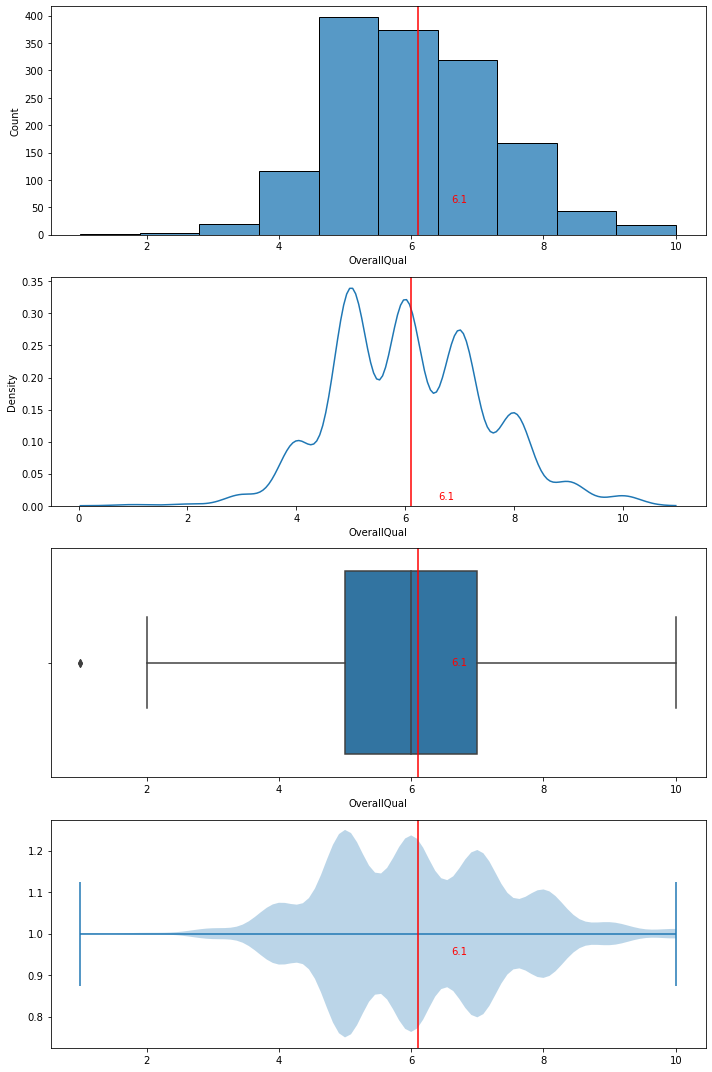

In [9]:
plt.figure(figsize = (10, 15))
var_m = np.mean(data[var])

plt.subplot(4, 1, 1)
sns.histplot(data[var], bins = 10)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 60, round(var_m, 2), color='r')

plt.subplot(4, 1, 2)
sns.kdeplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.01, round(var_m, 2), color='r')
# plt.xlim(-5, 85)  # x축 제한

plt.subplot(4, 1, 3)
sns.boxplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.01, round(var_m, 2), color='r')

plt.subplot(4, 1, 4)
plt.violinplot(data[var], vert = False, showmeans = False)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.95, round(var_m, 2), color='r')
# 밀도함수와 다른 점: 바이올린 플롯은 min, max부분에서 끝난다.
# 결측치가 존재하면 그래프가 그려지지 않는다.

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 평균을 근처로 잘 분포되어진 것 같아서 딱히 의문이 드는 부분은 없을 듯. 마감재가 그렇게 큰 역할을 하는가? 

8) 추가 분석해 볼 사항이 있나요?

> * 

### 17) 'OverallCond' (숫자형)

In [10]:
# 범주 3개짜리
var = data_n.columns[1]
var

'OverallCond'

2) 숫자, 범주?

> * OverallCond: Rates the overall condition of the house (주택의 전체적인 상태 등급) 

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

3) NaN 존재 유무 및 조치방안

In [11]:
data[var].isna().sum()

0

5) 기초통계량(수치화)

In [12]:
data[var].describe()

count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64

6) 분포 확인(시각화)

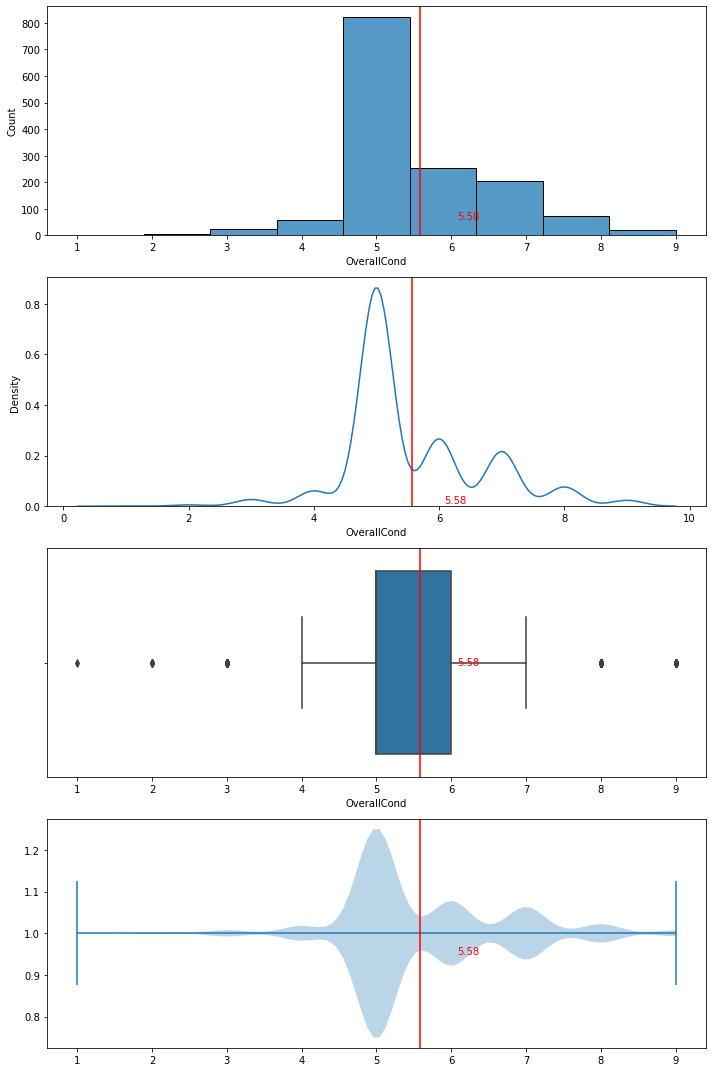

In [16]:
plt.figure(figsize = (10, 15))
var_m = np.mean(data[var])

plt.subplot(4, 1, 1)
sns.histplot(data[var], bins = 9)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 60, round(var_m, 2), color='r')

plt.subplot(4, 1, 2)
sns.kdeplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.01, round(var_m, 2), color='r')
# plt.xlim(-5, 85)  # x축 제한

plt.subplot(4, 1, 3)
sns.boxplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.01, round(var_m, 2), color='r')

plt.subplot(4, 1, 4)
plt.violinplot(data[var], vert = False, showmeans = False)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.95, round(var_m, 2), color='r')
# 밀도함수와 다른 점: 바이올린 플롯은 min, max부분에서 끝난다.
# 결측치가 존재하면 그래프가 그려지지 않는다.

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 5등급이 가장 많다. 이것에 대한 평가는 전문가가 할텐데? 이렇게 분균형적으로 평가를 내려도 괜찮은가? 

8) 추가 분석해 볼 사항이 있나요?

> * 

### 19) 'YearBuilt' (숫자형)

In [17]:
# 범주 3개짜리
var = data_n.columns[2]
var

'YearBuilt'

> * YearBuilt: Original construction date (건물 지은 해)

3) NaN 존재 유무 및 조치방안

In [18]:
data[var].isna().sum()

0

5) 기초통계량(수치화)

In [19]:
data[var].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

6) 분포 확인(시각화)

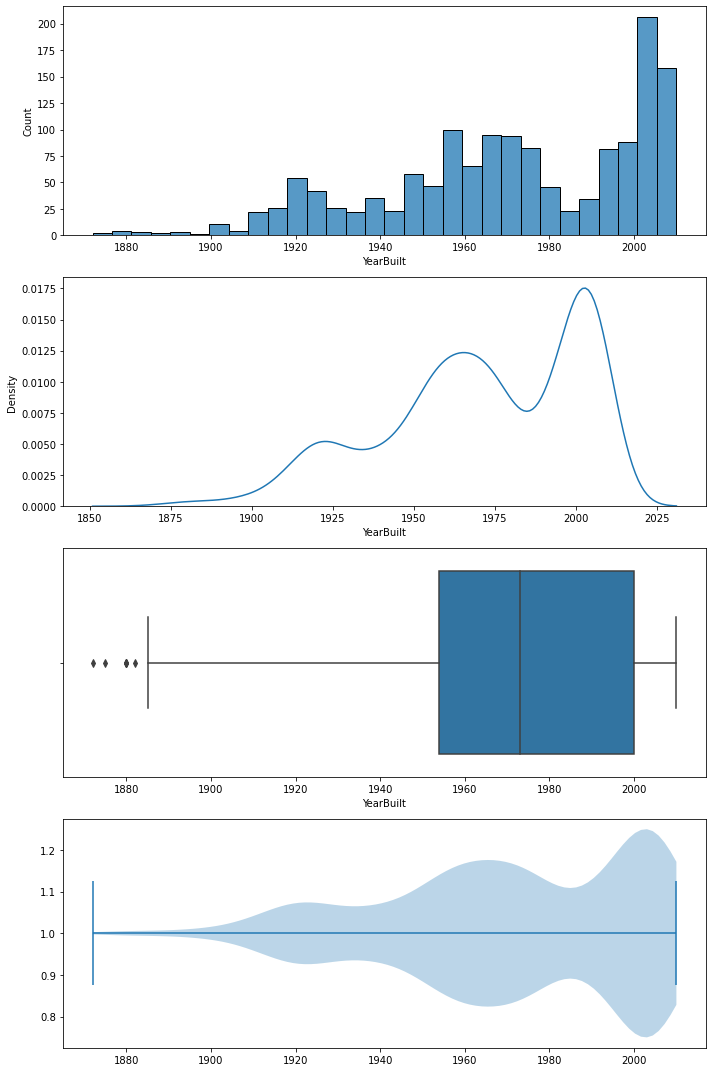

In [20]:
plt.figure(figsize = (10, 15))

plt.subplot(4, 1, 1)
sns.histplot(data[var], bins = 30)

plt.subplot(4, 1, 2)
sns.kdeplot(data[var])

plt.subplot(4, 1, 3)
sns.boxplot(data[var])

plt.subplot(4, 1, 4)
plt.violinplot(data[var], vert = False, showmeans = False)
# 밀도함수와 다른 점: 바이올린 플롯은 min, max부분에서 끝난다.
# 결측치가 존재하면 그래프가 그려지지 않는다.

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 1920년대, 1970년대, 2010년 별로 3개의 봉이 보인다. 왜 이때 건물을 많이 지은걸까? 재개발 시즌은 아닐까?  

8) 추가 분석해 볼 사항이 있나요?

> * 

### 20) 'YearRemodAdd'(숫자형)

In [22]:
# 범주 3개짜리
var = data_n.columns[3]
var

'YearRemodAdd'

2) 숫자, 범주?

> * YearRemodAdd: Remodel date (same as construction date if no remodeling or additions) 추가적으로 리모델링 한 날

3) NaN 존재 유무 및 조치방안

In [137]:
data[var].isna().sum()

0

5) 기초통계량(수치화)

In [138]:
data[var].describe()

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

6) 분포 확인(시각화)

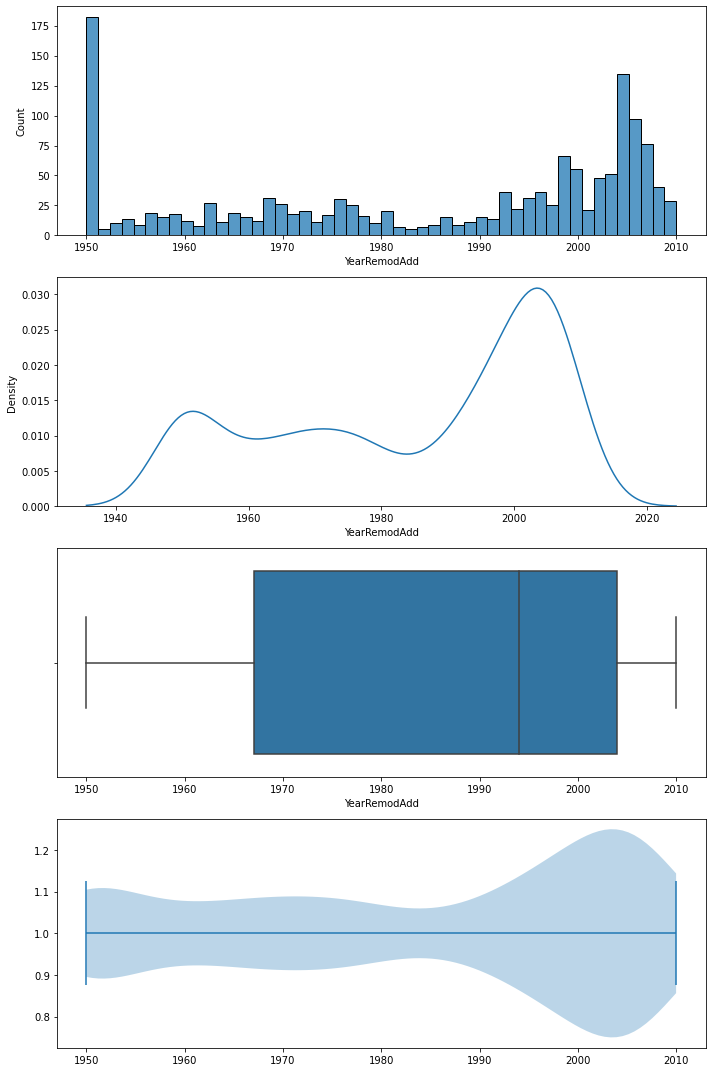

In [23]:
plt.figure(figsize = (10, 15))
var_m = np.mean(data[var])

plt.subplot(4, 1, 1)
sns.histplot(data[var], bins = 50)

plt.subplot(4, 1, 2)
sns.kdeplot(data[var])
# plt.xlim(-5, 85)  # x축 제한

plt.subplot(4, 1, 3)
sns.boxplot(data[var])

plt.subplot(4, 1, 4)
plt.violinplot(data[var], vert = False, showmeans = False)
# 밀도함수와 다른 점: 바이올린 플롯은 min, max부분에서 끝난다.
# 결측치가 존재하면 그래프가 그려지지 않는다.

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 1950년대에 리모델링 수요가 급증하고, 줄어들다가 최근에 2005년에 다시 늘어나게 되었다. 그 이유는 무엇일까? 건물을 짓고, 리모델링을 하고. 지역별로 차이가 있을까? 지역에 관련된 변수와 함께 조사를 해보면 좋을 것 같다.

8) 추가 분석해 볼 사항이 있나요?

> * 

### 26) 'MasVnrArea' (숫자형)

In [25]:
var = data_n.columns[4]
var

'MasVnrArea'

2) 숫자, 범주?

> * MasVnrArea: Masonry veneer area in square feet (벽면 베니어 평방)

3) NaN 존재 유무 및 조치방안

In [26]:
data[var].isna().sum()

8

In [161]:
g = data[var].isna()

g[g == True] # 맙소사 bool로 지정되어 있을 때는 'True'로 하면 안되는구나!!  

list(g[g == True].index)

[234, 529, 650, 936, 973, 977, 1243, 1278]

In [27]:
# 같은 계열의 열의 결측치 행 조사

g2 = data['MasVnrType'].isna()

g2[g2==True]

list(g2[g2 == True].index)

# 두개가 서로 동일 한 것을 확인. 

[234, 529, 650, 936, 973, 977, 1243, 1278]

5) 기초통계량(수치화)

In [28]:
data[var].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

6) 분포 확인(시각화)

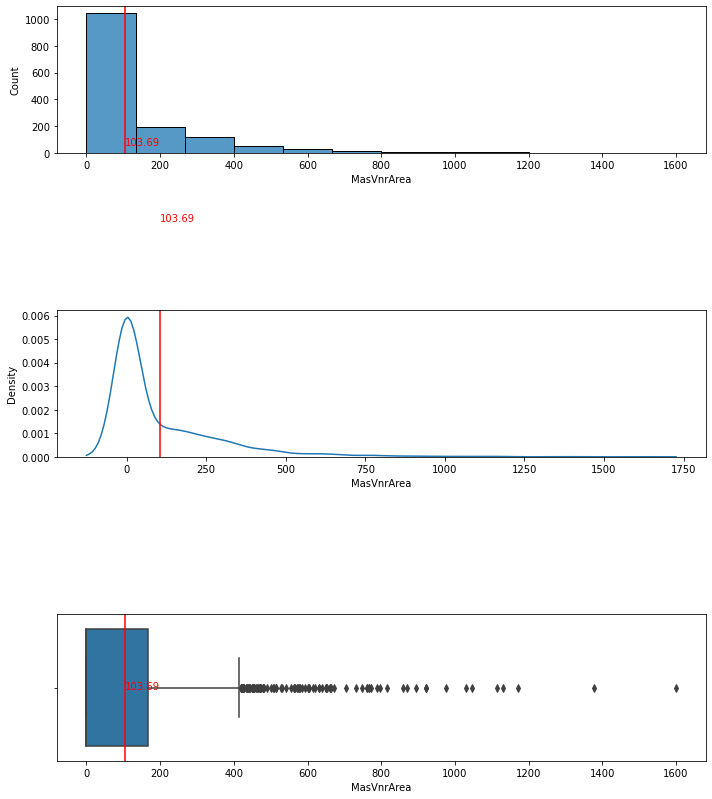

In [31]:
plt.figure(figsize = (10, 15))
var_m = np.mean(data[var])

plt.subplot(4, 1, 1)
sns.histplot(data[var], bins = 12)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 60, round(var_m, 2), color='r')

plt.subplot(4, 1, 2)
sns.kdeplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.01, round(var_m, 2), color='r')
# plt.xlim(-5, 85)  # x축 제한

plt.subplot(4, 1, 3)
sns.boxplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 0.5, 0.01, round(var_m, 2), color='r')

# plt.subplot(4, 1, 4)
# plt.violinplot(data[var], vert = False, showmeans = False)
# plt.axvline(var_m, color='red', linestyle='-')
# plt.text(var_m + 0.5, 0.95, round(var_m, 2), color='r')
# 밀도함수와 다른 점: 바이올린 플롯은 min, max부분에서 끝난다.
# 결측치가 존재하면 그래프가 그려지지 않는다.

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 저거 이상치가 너무 심각한데... 데이터의 불균형을 생각해봐야할 듯..0에 근접해 있으나, 다른 값들이 너무 차이가 나서 평균의 함정을 가지고 있는 데이터. 0인경우가 전체에서 70프로 이상을 차지한다.

8) 추가 분석해 볼 사항이 있나요?

> * 0인 경우가 얼마나 되려나? 이상치에 대한 부분도 조사를 해보자.

In [34]:
# 이상치 좀 더 자세하게 확인하기. 
q1 = data[var].quantile(0.25)
q3 = data[var].quantile(0.75)
q30 = data[var].quantile(0.70)

iqr = 1.5*(q3-q1)
data_q =data[var][ data[var] > (iqr+q3)]
data_jero = data[var][ data[var] ==0 ]
data_top = data[var][ data[var] >= q30 ]


# print(data_q)
#데이터를 다 보여줄 수는 없을까? 
print( '값이 0인 갯수 :', len(data_jero))
print('상위권 30프로 이상 : ', len(data_top))
print('이상치 갯수 :',len(data_q))
print('이상치가 있는 행 : ',list(data_q.index))

값이 0인 갯수 : 861
상위권 30프로 이상 :  437
이상치 갯수 : 96
이상치가 있는 행 :  [25, 37, 56, 58, 64, 70, 80, 81, 82, 104, 105, 109, 115, 151, 159, 161, 169, 173, 178, 180, 224, 231, 235, 249, 251, 297, 343, 349, 359, 362, 363, 403, 412, 423, 477, 479, 481, 517, 523, 524, 539, 540, 591, 598, 618, 623, 640, 654, 661, 678, 691, 700, 702, 718, 731, 755, 759, 763, 769, 798, 803, 808, 815, 825, 898, 944, 955, 961, 981, 987, 990, 997, 1059, 1083, 1111, 1169, 1191, 1193, 1209, 1228, 1256, 1268, 1275, 1286, 1287, 1289, 1298, 1324, 1336, 1353, 1373, 1417, 1420, 1426, 1437, 1447]


## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [11]:
target = 'SalePrice'

### (1) 숫자형 X --> 숫자형 Y

* 그래프 : jointplot
* 수치화 : 상관분석  
* 관계 평가

In [39]:
# 숫자형 데이터 (y값 포함) 
data_nu = data[['SalePrice','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea']]

1) 상관계수

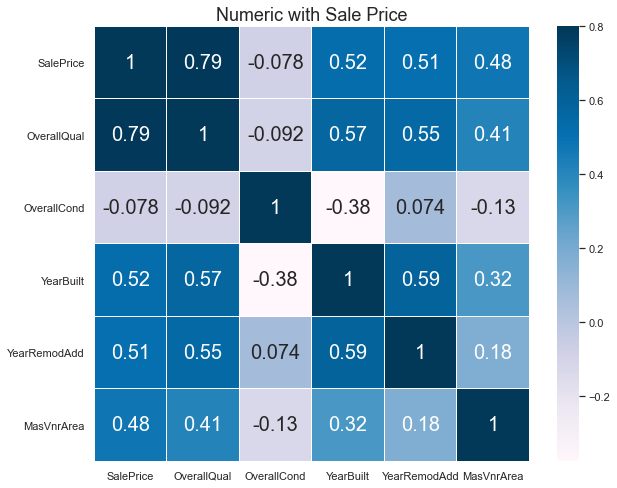

In [40]:
#상관관계 히트맵

#컬러와 폰트 사이즈 지정  
colormap = plt.cm.PuBu
sns.set(font_scale=1.0)

f, ax = plt.subplots(figsize = (10,8))
plt.title('Numeric with Sale Price',y=1, size=18)
sns.heatmap(data_nu.corr(), square = True, annot=True,annot_kws={'size':20},linewidths = 0.1, cmap = colormap, 
            linecolor = "white", vmax=0.8)
plt.show()

#### ① 'OverallQual' --> target

In [9]:
feature = data_nu.columns[1]
feature

'OverallQual'

1) 그래프 : scatterplot

<Figure size 720x432 with 0 Axes>

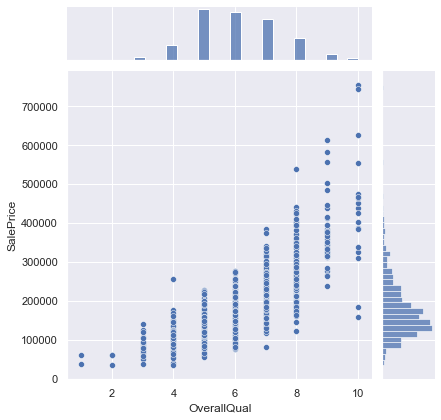

In [12]:
plt.figure(figsize=(10,6))
sns.jointplot(x=data[feature], y=data[target], data = data)
plt.show()

2) 수치화 : 상관계수와 p-value

In [14]:
# 상관계수와 p-value 
corr = spst.pearsonr(data[feature], data[target])
print('상관계수: {}, p-value: {}'.format(corr[0], corr[1]))

상관계수: 0.7909816005838048, p-value: 2.185675268e-313


3) 관계 평가하기

> * 

4) 추가 분석할 내용 정리

> * 

#### ① 'OverallCond' --> target

In [15]:
feature = data_nu.columns[2]
feature

'OverallCond'

1) 그래프 : scatterplot

<Figure size 720x432 with 0 Axes>

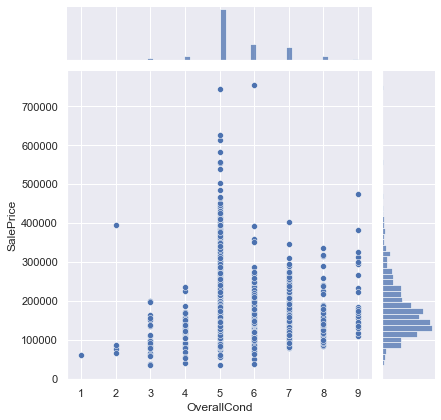

In [16]:
plt.figure(figsize=(10,6))
sns.jointplot(x=data[feature], y=data[target], data = data)
plt.show()

2) 수치화 : 상관계수와 p-value

In [17]:
# 상관계수와 p-value 
corr = spst.pearsonr(data[feature], data[target])
print('상관계수: {}, p-value: {}'.format(corr[0], corr[1]))

상관계수: -0.07785589404867801, p-value: 0.0029123512679174826


3) 관계 평가하기

> * 

4) 추가 분석할 내용 정리

> * 

#### ① 'YearBuilt' --> target

In [19]:
feature = data_nu.columns[3]
feature

'YearBuilt'

1) 그래프 : scatterplot

<Figure size 720x432 with 0 Axes>

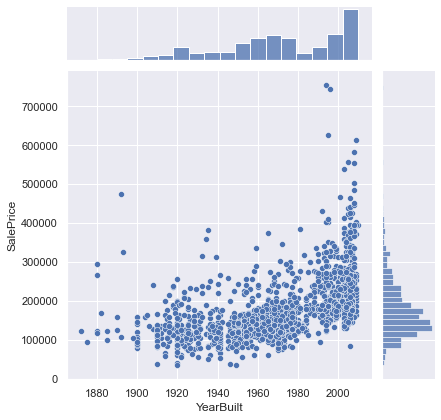

In [20]:
plt.figure(figsize=(10,6))
sns.jointplot(x=data[feature], y=data[target], data = data)
plt.show()

2) 수치화 : 상관계수와 p-value

In [21]:
# 상관계수와 p-value 
corr = spst.pearsonr(data[feature], data[target])
print('상관계수: {}, p-value: {}'.format(corr[0], corr[1]))

상관계수: 0.5228973328794968, p-value: 2.9902290990158995e-103


3) 관계 평가하기

> * 

4) 추가 분석할 내용 정리

> * 

#### ① 'YearRemodAdd' --> target

In [23]:
feature = data_nu.columns[4]
feature

'YearRemodAdd'

1) 그래프 : scatterplot

<Figure size 720x432 with 0 Axes>

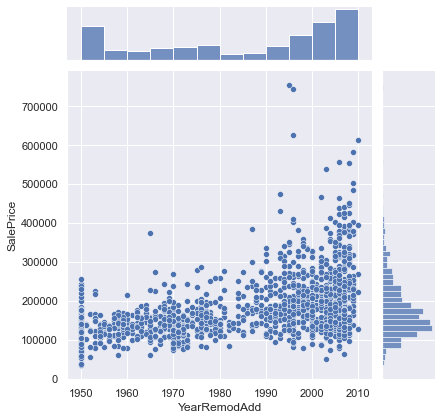

In [24]:
plt.figure(figsize=(10,6))
sns.jointplot(x=data[feature], y=data[target], data = data)
plt.show()

2) 수치화 : 상관계수와 p-value

In [25]:
# 상관계수와 p-value 
corr = spst.pearsonr(data[feature], data[target])
print('상관계수: {}, p-value: {}'.format(corr[0], corr[1]))

상관계수: 0.5071009671113862, p-value: 3.1649482419200737e-96


3) 관계 평가하기

> * 

4) 추가 분석할 내용 정리

> * 

#### ①'MasVnrArea' --> target

In [41]:
feature = data_nu.columns[5]
feature

'MasVnrArea'

1) 그래프 : scatterplot

<Figure size 720x432 with 0 Axes>

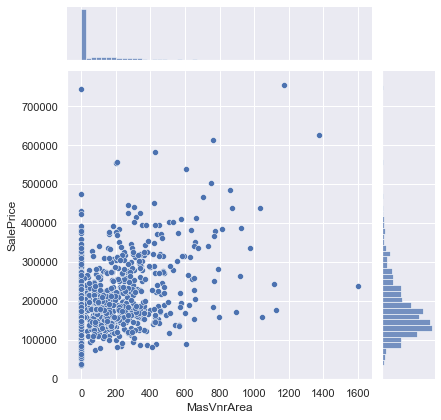

In [27]:
plt.figure(figsize=(10,6))
sns.jointplot(x=data[feature], y=data[target], data = data)
plt.show()

In [46]:
data_nu.dropna(subset=[feature], axis=0, inplace=True)




2) 수치화 : 상관계수와 p-value

In [47]:
# 상관계수와 p-value 
corr = spst.pearsonr(data_nu[feature], data_nu[target])
print('상관계수: {}, p-value: {}'.format(corr[0], corr[1]))

상관계수: 0.47749304709571555, p-value: 1.458508642588133e-83


3) 관계 평가하기

> * 

4) 추가 분석할 내용 정리

> * 

### (2) 범주형 X --> 숫자형 Y

* 시각화(barplot)
* 수치화(t-test / anova)
* 관계 평가

#### ① 'RoofStyle' --> target

In [48]:
feature = data_c.columns[0]
feature

'RoofStyle'

2) 시각화(barplot)

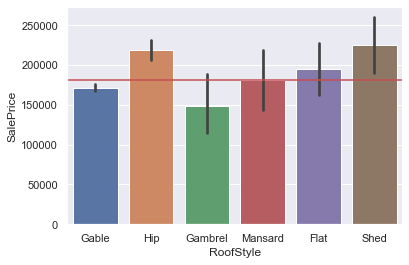

In [49]:
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

2) 수치화(t-test / anova)

In [50]:
data[feature].isna().sum()

0

In [57]:
data[feature].unique()
list_n = data[feature].unique()
list_n

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

In [64]:
Gable = data.loc[data.RoofStyle == 'Gable', target]
Hip = data.loc[data.RoofStyle == 'Hip', target]
Gambrel = data.loc[data.RoofStyle == 'Gambrel', target]
Mansard = data.loc[data.RoofStyle == 'Mansard', target]
Flat = data.loc[data.RoofStyle == 'Flat', target]
Shed = data.loc[data.RoofStyle == 'Shed', target]

In [65]:
spst.f_oneway(Gable, Hip, Gambrel, Mansard, Flat, Shed)

F_onewayResult(statistic=17.80549722914421, pvalue=3.653523047099125e-17)

4) 관계 평가하기

> * F값이 약 64.8, p-value가 0에 수렴하는 것으로 보아, 타켓과 강한관계로 볼 수 있다.

#### ① RoofMatl --> target

In [66]:
feature = data_c.columns[1]
feature

'RoofMatl'

2) 시각화(barplot)

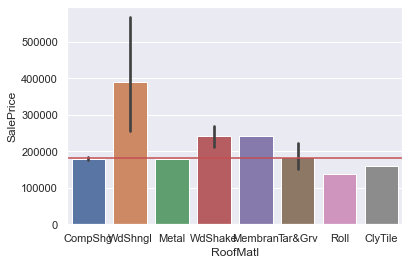

In [67]:
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

2) 수치화(t-test / anova)

In [68]:
data[feature].isna().sum()

0

In [69]:
data[feature].unique()

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

In [76]:
CompShg = data.loc[data.RoofMatl == 'CompShg', target]
WdShngl = data.loc[data.RoofMatl == 'WdShngl', target]
Metal = data.loc[data.RoofMatl == 'Metal', target]
WdShake = data.loc[data.RoofMatl == 'WdShake', target]
Membran = data.loc[data.RoofMatl == 'Membran', target]
Tar_Grv = data.loc[data.RoofMatl == 'Tar&Grv', target]
Roll = data.loc[data.RoofMatl == 'Roll', target]
ClyTile = data.loc[data.RoofMatl == 'ClyTile', target]

In [77]:
spst.f_oneway(CompShg, WdShngl, Metal, WdShake, Membran, Tar_Grv,Roll, ClyTile)

F_onewayResult(statistic=6.727304893420313, pvalue=7.231444779987188e-08)

4) 관계 평가하기

> * F값이 약 64.8, p-value가 0에 수렴하는 것으로 보아, 타켓과 강한관계로 볼 수 있다.

#### ① 'Exterior1st'--> target

In [78]:
feature = data_c.columns[2]
feature

'Exterior1st'

2) 시각화(barplot)

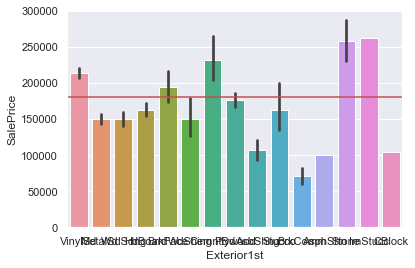

In [79]:
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

2) 수치화(t-test / anova)

In [80]:
data[feature].isna().sum()

0

In [81]:
data[feature].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [83]:
VinylSd = data.loc[data.Exterior1st == 'VinylSd', target]
MetalSd = data.loc[data.Exterior1st == 'MetalSd', target]
WdSdng = data.loc[data.Exterior1st == 'Wd Sdng', target]
HdBoard = data.loc[data.Exterior1st == 'HdBoard', target]
BrkFace = data.loc[data.Exterior1st == 'BrkFace', target]
WdShing = data.loc[data.Exterior1st == 'WdShing', target]
CemntBd = data.loc[data.Exterior1st == 'CemntBd', target]
Plywood = data.loc[data.Exterior1st == 'Plywood', target]
AsbShng = data.loc[data.Exterior1st == 'AsbShng', target]
Stucco = data.loc[data.Exterior1st == 'Stucco', target]
BrkComm = data.loc[data.Exterior1st == 'BrkComm', target]
AsphShn = data.loc[data.Exterior1st == 'AsphShn', target]
Stone = data.loc[data.Exterior1st == 'Stone', target]
ImStucc = data.loc[data.Exterior1st == 'ImStucc', target]
CBlock = data.loc[data.Exterior1st == 'CBlock', target]

In [84]:
spst.f_oneway(VinylSd, MetalSd, WdSdng, HdBoard, BrkFace, WdShing, CemntBd, Plywood, AsbShng, Stucco, BrkComm, AsphShn,
       Stone, ImStucc, CBlock)

F_onewayResult(statistic=18.61174286624578, pvalue=2.5860887286376316e-43)

> * F값이 약 64.8, p-value가 0에 수렴하는 것으로 보아, 타켓과 강한관계로 볼 수 있다.

#### ① 'Exterior2nd' --> target

In [85]:
feature = data_c.columns[3]
feature

'Exterior2nd'

2) 시각화(barplot)

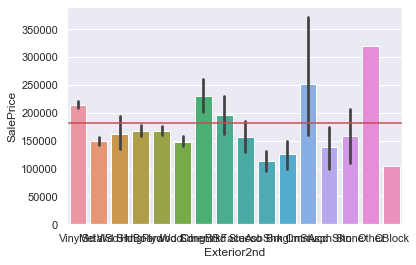

In [86]:
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

2) 수치화(t-test / anova)

In [87]:
data[feature].isna().sum()

0

In [88]:
data[feature].unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

In [102]:
# 열들이 완전 다름...  

VinylSd = data.loc[data.Exterior2nd == 'VinylSd', target]
MetalSd = data.loc[data.Exterior2nd == 'MetalSd', target]

WdShng = data.loc[data.Exterior2nd == 'Wd Shng', target]

HdBoard = data.loc[data.Exterior2nd == 'HdBoard', target]
Plywood = data.loc[data.Exterior2nd == 'Plywood', target]
WdSdng = data.loc[data.Exterior2nd == 'Wd Sdng', target]
CmentBd = data.loc[data.Exterior2nd == 'CmentBd', target]
BrkFace = data.loc[data.Exterior2nd == 'BrkFace', target]
Stucco = data.loc[data.Exterior2nd == 'Stucco', target]
AsbShng = data.loc[data.Exterior2nd == 'AsbShng', target]

BrkCmn = data.loc[data.Exterior2nd == 'Brk Cmn', target]

ImStucc = data.loc[data.Exterior2nd == 'ImStucc', target]
AsphShn = data.loc[data.Exterior2nd == 'AsphShn', target]
Stone = data.loc[data.Exterior2nd == 'Stone', target]
Other = data.loc[data.Exterior2nd == 'Other', target]
CBlock = data.loc[data.Exterior2nd == 'CBlock', target]

In [101]:
spst.f_oneway(VinylSd, MetalSd, WdShng, HdBoard, Plywood, WdSdng, CmentBd, BrkFace, Stucco, AsbShng, 
              BrkCmn, ImStucc, AsphShn, Stone, Other, CBlock)

F_onewayResult(statistic=17.500839571369834, pvalue=4.8421856706985465e-43)

4) 관계 평가하기

> * F값이 약 64.8, p-value가 0에 수렴하는 것으로 보아, 타켓과 강한관계로 볼 수 있다.

#### ① 'MasVnrType' --> target

In [103]:
feature = data_c.columns[4]
feature

'MasVnrType'

2) 시각화(barplot)

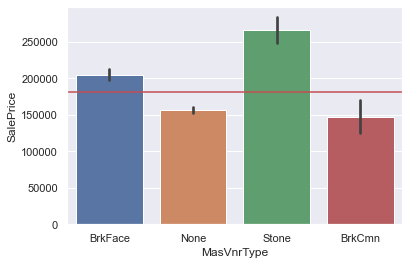

In [104]:
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

2) 수치화(t-test / anova)

In [105]:
data[feature].isna().sum()

8

In [106]:
data[feature].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [108]:
data['MasVnrType'].fillna('None', inplace=True)
data[feature].isna().sum()

0

In [109]:
BrkFace = data.loc[data.MasVnrType == 'BrkFace', target]
N_one = data.loc[data.MasVnrType == 'None', target]
Stone = data.loc[data.MasVnrType == 'Stone', target]
BrkCmn = data.loc[data.MasVnrType == 'BrkCmn', target]


In [110]:
spst.f_oneway(BrkFace, N_one, Stone, BrkCmn)

F_onewayResult(statistic=108.91130455887651, pvalue=1.2797035312662622e-63)

4) 관계 평가하기

> * F값이 약 64.8, p-value가 0에 수렴하는 것으로 보아, 타켓과 강한관계로 볼 수 있다.

#### ① 'ExterQual' --> target

In [111]:
feature = data_c.columns[5]
feature

'ExterQual'

2) 시각화(barplot)

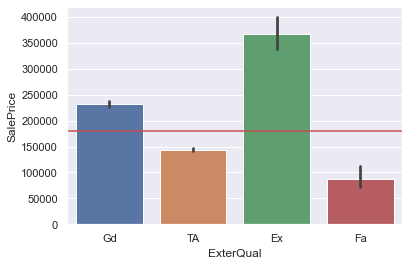

In [112]:
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

2) 수치화(t-test / anova)

In [113]:
data[feature].isna().sum()

0

In [114]:
data[feature].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [116]:
Gd = data.loc[data.ExterQual == 'Gd', target]
TA = data.loc[data.ExterQual == 'TA', target]
Ex = data.loc[data.ExterQual == 'Ex', target]
Fa = data.loc[data.ExterQual == 'Fa', target]


In [117]:
spst.f_oneway(Gd, TA, Ex, Fa)

F_onewayResult(statistic=443.33483141504627, pvalue=1.4395510967787893e-204)

4) 관계 평가하기

> * F값이 약 64.8, p-value가 0에 수렴하는 것으로 보아, 타켓과 강한관계로 볼 수 있다.

#### ①'ExterCond'--> target

In [118]:
feature = data_c.columns[6]
feature

'ExterCond'

2) 시각화(barplot)

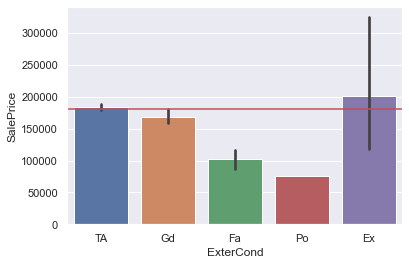

In [119]:
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

2) 수치화(t-test / anova)

In [120]:
data[feature].isna().sum()

0

In [121]:
data[feature].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [122]:
TA = data.loc[data.ExterCond == 'TA', target]
Gd = data.loc[data.ExterCond == 'Gd', target]
Fa = data.loc[data.ExterCond == 'Fa', target]
Po = data.loc[data.ExterCond == 'Po', target]
Ex = data.loc[data.ExterCond == 'Ex', target]



In [123]:
spst.f_oneway(TA, Gd, Fa, Po, Ex)

F_onewayResult(statistic=8.798714214177485, pvalue=5.106680608671862e-07)

4) 관계 평가하기

> * F값이 약 64.8, p-value가 0에 수렴하는 것으로 보아, 타켓과 강한관계로 볼 수 있다.

#### ① Foundation --> target

In [124]:
feature = data_c.columns[7]
feature

'Foundation'

2) 시각화(barplot)

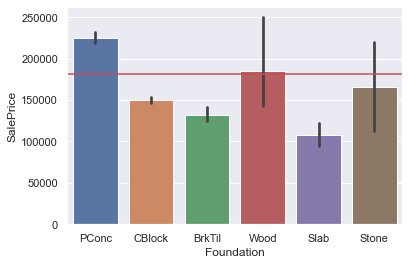

In [125]:
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

2) 수치화(t-test / anova)

In [126]:
data[feature].isna().sum()

0

In [127]:
data[feature].unique()

array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)

In [128]:
PConc = data.loc[data.Foundation == 'PConc', target]
CBlock = data.loc[data.Foundation == 'CBlock', target]
BrkTil = data.loc[data.Foundation == 'BrkTil', target]
Wood = data.loc[data.Foundation == 'Wood', target]
Slab = data.loc[data.Foundation == 'Slab', target]
Stone = data.loc[data.Foundation == 'Stone', target]

In [129]:
spst.f_oneway(PConc, CBlock, BrkTil, Wood, Slab, Stone)

F_onewayResult(statistic=100.25385058740888, pvalue=5.791895002232233e-91)

4) 관계 평가하기

> * F값이 약 64.8, p-value가 0에 수렴하는 것으로 보아, 타켓과 강한관계로 볼 수 있다.

#### ① 'BsmtQual' --> target

In [130]:
feature = data_c.columns[8]
feature

'BsmtQual'

2) 시각화(barplot)

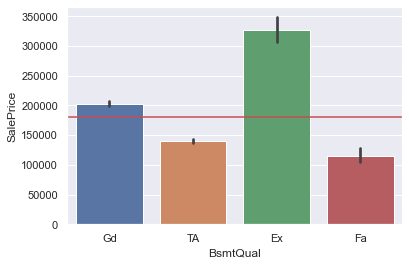

In [131]:
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

2) 수치화(t-test / anova)

In [132]:
data[feature].isna().sum()

37

In [133]:
data[feature].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [134]:
data['BsmtQual'].fillna('Na', inplace=True)
data[feature].isna().sum()

0

In [135]:
Gd = data.loc[data.BsmtQual == 'Gd', target]
TA = data.loc[data.BsmtQual == 'TA', target]
Ex = data.loc[data.BsmtQual == 'Ex', target]
Na = data.loc[data.BsmtQual == 'Na', target]
Fa = data.loc[data.BsmtQual == 'Fa', target]


In [137]:
spst.f_oneway(Gd, TA, Ex,Na, Fa)

F_onewayResult(statistic=316.1486350004241, pvalue=8.158548084712274e-196)

4) 관계 평가하기

> * F값이 약 64.8, p-value가 0에 수렴하는 것으로 보아, 타켓과 강한관계로 볼 수 있다.

#### ①'BsmtCond'--> target

In [138]:
feature = data_c.columns[9]
feature

'BsmtCond'

2) 시각화(barplot)

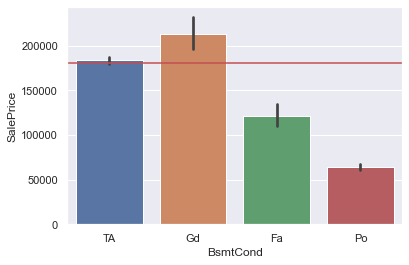

In [139]:
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

2) 수치화(t-test / anova)

In [142]:
data[feature].isna().sum()

37

In [141]:
data[feature].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [143]:
data[feature].fillna('Na', inplace=True)
data[feature].isna().sum()

0

In [144]:
Gd = data.loc[data.BsmtCond == 'Gd', target]
TA = data.loc[data.BsmtCond == 'TA', target]
Po = data.loc[data.BsmtCond == 'Po', target]
Na = data.loc[data.BsmtCond == 'Na', target]
Fa = data.loc[data.BsmtCond == 'Fa', target]

In [145]:
spst.f_oneway(TA, Gd, Na, Fa, Po)

F_onewayResult(statistic=19.70813904568719, pvalue=8.195793756122466e-16)

4) 관계 평가하기

> * F값이 약 64.8, p-value가 0에 수렴하는 것으로 보아, 타켓과 강한관계로 볼 수 있다.

#### ① BsmtExposure --> target

In [148]:
feature = data_c.columns[10]
feature

'BsmtExposure'

2) 시각화(barplot)

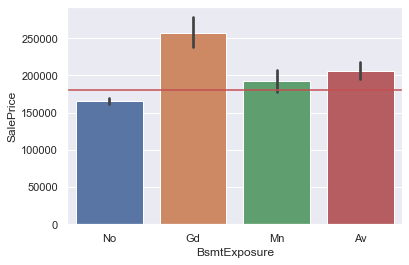

In [149]:
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

2) 수치화(t-test / anova)

In [150]:
data[feature].isna().sum()

38

In [151]:
data[feature].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [152]:
data[feature].fillna('Na', inplace=True)
data[feature].isna().sum()

0

In [155]:
Gd = data.loc[data.BsmtExposure == 'Gd', target]
Av = data.loc[data.BsmtExposure == 'Av', target]
No = data.loc[data.BsmtExposure == 'No', target]
Na = data.loc[data.BsmtExposure == 'Na', target]
Mn = data.loc[data.BsmtExposure == 'Mn', target]

In [156]:
spst.f_oneway(No, Gd, Mn, Av, Na)

F_onewayResult(statistic=63.939761270066455, pvalue=7.557758359196251e-50)

4) 관계 평가하기

> * F값이 약 64.8, p-value가 0에 수렴하는 것으로 보아, 타켓과 강한관계로 볼 수 있다.

### (3) 관계 정리하기

① 강한관계

② 중간관계

③ 관계없음

In [86]:
var = 'SibSp'